#  Mini Projeto de Análise de Dados <br/>
Este sucinto exercício foi proposto pelo curso **Python Impressionador, da Hashtag Cursos**. Ele tem como objetivo por em prática a biblioteca **pandas** e suas principais funções. <br/><br/> 

### Sobre as fontes   <br/>


 Foram fornecidos pelo professor dados de 2019 de uma empresa de prestação de serviços divididos em 3 planilhas, cujo tema está associado ao seu nome de arquivo, respectivamente: 

- CadastroFuncionarios.csv
- CadastroClientes.csv
- BaseServiçosPrestados.xlsx <br/><br/>

### O que queremos saber/fazer? <br/>

1. Qual o valor total da folha salarial? <br>    
2. Qual foi o faturamento da empresa?<br>      
3. Qual o % de funcionários que já fechou algum contrato?<br>     
4. Qual o total de contratos que cada área da empresa já fechou?<br>
5. Qual o total de funcionários por área ? <br>
6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br/><br/>

### Importação de bibliotecas e arquivos e tratamento de dados

In [6]:
#Iniciar importando a biblioteca e usando a função pd.read_extensao() para criar os DataFrames

import pandas as pd

CadastroFuncionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
CadastroClientes_df = pd.read_csv('CadastroClientes.csv', sep=';')
BaseServicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

#Remover colunas que não serão usadas no projeto; Axis = 1 é para informar a aplicação em colunas

CadastroFuncionarios_df = CadastroFuncionarios_df.drop(['Estado Civil','Cargo'], axis = 1)

#Display de cada uma dos DataFrames com o .head() para exibir apenas as 5 primeiras linhas

display(CadastroFuncionarios_df.head())
display(CadastroClientes_df.head())
display(BaseServicos_df.head())

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


### 1 -  Qual o valor total da folha salarial?

In [26]:
# criar uma nova coluna que contem a soma de cada valor relevante no salário

CadastroFuncionarios_df['Valor Total Salarial'] = (
  CadastroFuncionarios_df['Salario Base'] 
+ CadastroFuncionarios_df['Impostos']
+ CadastroFuncionarios_df['Beneficios'] 
+ CadastroFuncionarios_df['VT'] 
+ CadastroFuncionarios_df['VR'])

#utilizar o método .sum() para obter a resposta a partir da nova coluna

print('\nResposta:')
print('O valor total da folha salarial é: ' 
      'R${:,}'.format(sum(CadastroFuncionarios_df['Valor Total Salarial'])))


Resposta:
O valor total da folha salarial é: R$2,717,493.22


### 2 - Qual foi o faturamento da empresa?

In [27]:
#Aqui utilizar o método .merge(), inserindo na tabela que contém os fatos uma tabela de caracterísitcas
#Escrito assim, com a [[lista de colunas]], o merge terá apenas o que é relevante para a questão

faturamento_df = BaseServicos_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(
    CadastroClientes_df[['ID Cliente','Valor Contrato Mensal']], on  = 'ID Cliente')

#Utilizar de duas das colunas combinadas da nova tabela para o calculo de uma terceira

faturamento_df['Contrato x Tempo'] = (
faturamento_df['Valor Contrato Mensal'] 
* faturamento_df['Tempo Total de Contrato (Meses)']
)

display(faturamento_df)

faturamento_total = faturamento_df['Contrato x Tempo'].sum()

print('\nResposta:')
print(f'O valor total da faturamento é R${faturamento_total:,}')

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Contrato x Tempo
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590



Resposta:
O valor total da faturamento é R$5,519,160


### 3 - Qual o % de funcionários que já fechou algum contrato?

In [28]:
#Aqui será necessário usar o método .unique() para filtrar ID's repetidas na base de serviços
#Cada uma das entradas únicas corresponde a um contrato fechado
#O método len() é útil para contar a quantidade de linhas, logo, de funcionários também.

Funcionarios_total = len(CadastroFuncionarios_df['ID Funcionário'])
Funcionarios_unicos = len(BaseServicos_df['ID Funcionário'].unique())

#Comparar com a quantidade total de funcionários da empresa e imprimir a razão

Percentual_contato_fechado = Funcionarios_unicos / Funcionarios_total

print('\nResposta:')
print(f'{Percentual_contato_fechado:.1%} dos funcionários já fecharam contrato')


Resposta:
86.8% dos funcionários já fecharam contrato


### 4 - Qual o total de contratos que cada área da empresa já fechou?



Resposta:
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


<AxesSubplot:>

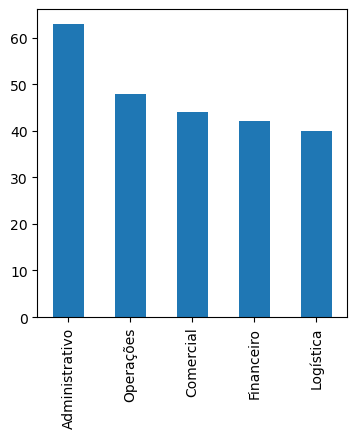

In [30]:
#Mergir apenas as colunas relevantes de Dataframes distintos, garantindo uma análise com dados factuais

contratos_area_df = BaseServicos_df[['Codigo do Servico', 'ID Funcionário']].merge(
    CadastroFuncionarios_df[['ID Funcionário','Area']], on  = 'ID Funcionário')

#utilizar o método .value_counts() devolve uma contagem para cada categoria

qtde_contratos_area = contratos_area_df['Area'].value_counts()
print('\nResposta:')
print(qtde_contratos_area)

#o método .plot irá gerar um gráfico do tipo e do tamanho discriminados nos argumentos

qtde_contratos_area.plot(kind='bar', figsize=(4,4))

### 5 - Qual o total de funcionários por área ?


Resposta:
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<AxesSubplot:>

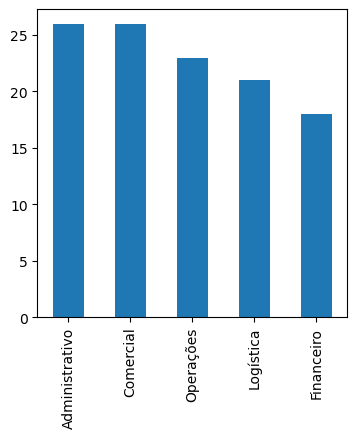

In [31]:
#Procedimento identico ao da questão anterior, porém sem a necessidade de combinar Dataframes

qtde_funcionarios_area = CadastroFuncionarios_df['Area'].value_counts()
print('\nResposta:')
print(qtde_funcionarios_area)
qtde_funcionarios_area.plot(kind='bar', figsize=(4,4))

### 6 - Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [32]:
#Utilizar o método .mean() para obter a média de toda a coluna referente aos contratos mensais

ticket_medio = CadastroClientes_df['Valor Contrato Mensal'].mean()
print('\nResposta:')
print(f'O valor do ticket medio é de R${ticket_medio:,.2f}')


Resposta:
O valor do ticket medio é de R$2,502.56
